In [5]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import torch
from scipy import signal
import imageio
from scipy.ndimage import gaussian_filter

In [6]:
# Load gaussian cluster data
def load_gaussian_clusters(file_path):
    
    raw_data_path = list(Path(file_path).iterdir())

    data = []

    for path in raw_data_path:
        data.append(np.load(path))
    
    return data
        
        
data = load_gaussian_clusters("../stimuli/obvious_gaussian_clusters")
print("# of Stimuli: ", len(data))
stim = data[12]
print("Stimuli Shape: ", stim.shape)

print(stim)

def normalize_axis(v, max_width):
    if np.min(v) < 0:
        v = v + -np.min(v)
    if np.max(v) > max_width:
        v = v * max_width / np.max(v)
    return v
def normalize(stim):
    stim = np.copy(stim)
    stim[:, 0] = normalize_axis(stim[:, 0], 800)
    stim[:, 1] = normalize_axis(stim[:, 1], 500)
    return stim

stim = normalize(stim)
stim = np.round(stim).astype(int)
print(stim)


# of Stimuli:  18
Stimuli Shape:  (20, 3)
[[466.3617951  513.32415499   0.        ]
 [431.50146296 554.29850785   0.        ]
 [463.25046655 520.06240849   0.        ]
 [468.39420233 498.27101789   0.        ]
 [430.93905392 578.19346744   0.        ]
 [728.37676965 497.98732932   1.        ]
 [714.52042943 510.70379776   1.        ]
 [720.06234808 504.84214562   1.        ]
 [714.63105026 505.42709197   1.        ]
 [766.00259254 499.82659031   1.        ]
 [ 63.32533639 751.30673712   2.        ]
 [149.4200471  773.50513896   2.        ]
 [ 38.0281254  744.01229814   2.        ]
 [ 54.00267681 802.08822117   2.        ]
 [ 31.73119419 810.51084175   2.        ]
 [736.19080839 196.64091769   3.        ]
 [693.13533462 201.89345378   3.        ]
 [733.73276531 261.23846931   3.        ]
 [758.56015635 187.41390824   3.        ]
 [708.96275249 233.23400798   3.        ]]
[[466 317   0]
 [432 342   0]
 [463 321   0]
 [468 307   0]
 [431 357   0]
 [728 307   1]
 [715 315   1]
 [720 311   

<AxesSubplot:>

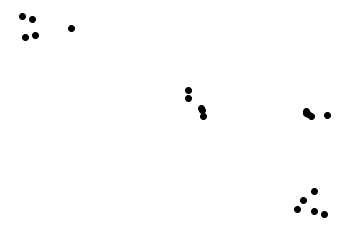

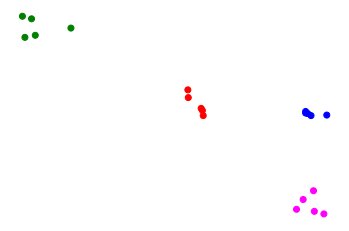

In [7]:
# Visualize Stimuli
colors = np.array(['red', 'blue', 'green', 'magenta', 'cyan', 'pink'])
def plot_stimuli(X, save_file, show_labels=True):
    fig, ax = plt.subplots()
    c_idx = X[:, 2].astype(int)        
    c = colors[c_idx]
    
    plt.axis('off')
    
    if show_labels:
        ax.scatter(X[:, 0], X[:, 1], color=colors[X[:, 2].astype(int)])
    else:
        ax.scatter(X[:, 0], X[:, 1], color='black')
        
    fig.savefig(save_file)
    return ax


# row_scaling_factor = np.max(stim[:,0])
# col_scaling_factor = np.max(stim[:,1])
# stim[:,0:2] = (stim[:,0:2]-np.min(stim[:,0:2])) * 30/(np.max(stim[:,0:2])-np.min(stim[:,0:2]))

# print('Unnormalized')
plot_stimuli(stim, 'unnormalized.png', show_labels=False)
# print('Unnormalized Labeled')
plot_stimuli(stim, 'unnormalized_labeled.png', show_labels=True)

# # Normalize Data + convert to int
# stim[:,0:2] = (stim[:,0:2]-np.min(stim[:,0:2])) * 30/(np.max(stim[:,0:2])-np.min(stim[:,0:2]))
# stim1 = np.round(stim).astype(int)
# # print('Normalized')
# plot_stimuli(stim1, 'normalized.png', show_labels=False)
# # print('Normalized Labeled')
# plot_stimuli(stim1, 'normalized_labeled.png', show_labels=True)

# stim = stim1

(288, 432)


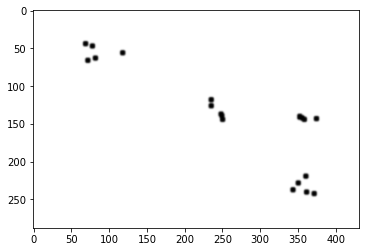

In [9]:
# Load input stimuli
im = imageio.imread('unnormalized.png')
rgb_weights = [0.2989, 0.5870, 0.1140]
im = np.dot(im[...,:3], rgb_weights)
print(im.shape)

plt.imshow(im, cmap=plt.get_cmap("gray"))


# # Represent points as 2D image
# row_max = np.max(stim[:,0])
# col_max = np.max(stim[:,1])
# im = np.zeros((row_max + 10, col_max + 10))
# im[stim[:,0], stim[:,1]] = 1.0

# plt.imshow(im, cmap=plt.get_cmap("gray"))


# apply gaussian filter
h, w = im.shape
out = np.zeros((int(h/2), int(w/2)), dtype=np.float64)
g_im = gaussian_filter(im, sigma=1)
plt.imshow(g_im, cmap=plt.get_cmap("gray"))

In [10]:
# # Represent points as 2D image
# im = np.zeros((36,36))
# im[stim[:,0], stim[:,1]] = 1.0
# print(im)

# fig, ax2 = plt.subplots()
# ax2.imshow(im, cmap='gray_r')

(288, 432)
(253, 379)
225.46373803188354
254.97450000001302


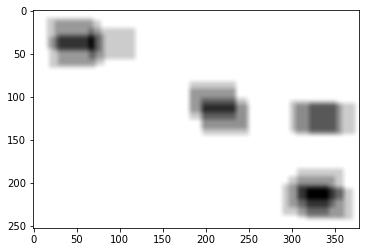

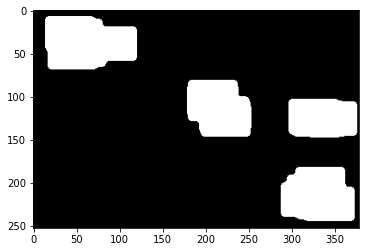

In [11]:
# Average Convolution

def avg_conv_2d(im, filt):
    out = signal.convolve2d(im, filt, mode='valid')
    return out

    
# kernel = np.ones((6,6)).astype(float) / 36
# out = avg_conv_2d(im, kernel)

# fig, ax3 = plt.subplots()
# ax3.imshow(out, cmap='gray_r')

# kernel = np.ones((3,3)).astype(float) / 9
# out = avg_conv_2d(im, kernel)

# fig, ax3 = plt.subplots()
# ax3.imshow(out, cmap='gray_r')


print(g_im.shape)
h, w = g_im.shape
sf = 8
k_h, k_w = int(h/sf), int(w/sf)
kernel = np.ones((k_h, k_w)).astype(float) / (k_h*k_w)
out = avg_conv_2d(g_im, kernel)
print(out.shape)

fig, ax3 = plt.subplots()
ax3.imshow(out, cmap=plt.get_cmap("gray"))

print(np.min(out))

print(np.max(out))

bool_out = out <= 254.00
# bool_out[bool_out >= 254.00] = 0
# bool_out[bool_out < 254.00] = 1

fig, ax3 = plt.subplots()
ax3.imshow(bool_out, cmap=plt.get_cmap("gray"))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
4
(288, 432)
(288, 432)


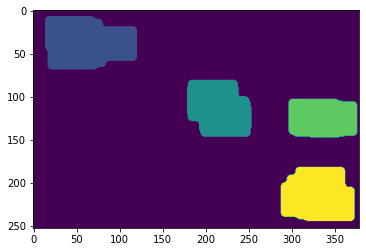

In [12]:
from scipy import ndimage
import cv2
labels, nb = ndimage.label(bool_out)
plt.imshow(labels)
print(labels)
print(nb)

resized_out = cv2.resize(labels.astype('float32'), (w, h))
resized_out = resized_out.astype(int)
print(g_im.shape)
print(resized_out.shape)


# plt.imshow(resized_out)

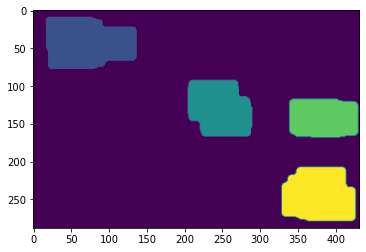

In [13]:
plt.imshow(resized_out)

In [14]:
resized_out[230]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
labels[20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

254.97449999999998
True
False


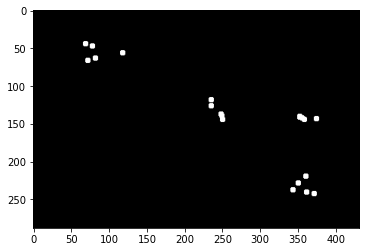

In [16]:
print(np.max(im))
bool_im = im <= 254.00
# bool_im[50]
fig, ax3 = plt.subplots()
ax3.imshow(bool_im, cmap=plt.get_cmap("gray"))

print(np.max(bool_im))
print(np.min(bool_im))

int64


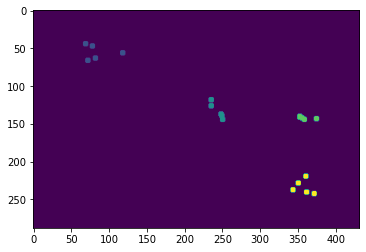

In [17]:
final = np.multiply(resized_out, bool_im)
print(final.dtype)

fig, ax3 = plt.subplots()
ax3.imshow(final)

In [98]:
# generate predictions
pred = np.copy(stim)
for i in range(stim.shape[0]):
    x, y, label = stim[i]
    pred_label = final[x, y]
    pred[i, -1] = pred_label
    
print("stim: ", stim)
print("pred: ", pred)

IndexError: index 352 is out of bounds for axis 0 with size 288